# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
# !pip install Pillow
#!pip install scipy==1.1.0

In [2]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os
from skimage.transform import resize, rescale
from skimage import io
import matplotlib.pyplot as plt


We set the random seed so that the results don't vary drastically.

In [26]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [5]:
imagelist = os.listdir('./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/')
# imagelist = os.listdir('./Project_data/train/WIN_20180907_15_45_56_Pro_Thumbs Down_new/')
# imagelist = os.listdir('./Project_data/train/WIN_20180907_15_46_25_Pro_Stop Gesture_new/')

In [126]:
train_doc = np.random.permutation(open('./Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('./Project_data/val.csv').readlines())
batch_size = 40

In [108]:
train_doc.shape

(300,)

In [57]:
imagelist = sorted(imagelist)

In [204]:
from skimage import io
# path = '/content/drive/My Drive/data/GR/train/WIN_20180907_15_45_56_Pro_Thumbs Down_new/'
path = './Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/'
#path = './Project_data/train/WIN_20180907_15_46_25_Pro_Stop Gesture_new/'

image_list = []
  # print(path+image)

for i in range(21, 29):
    print(path+imagelist[i])
    image = io.imread(path+imagelist[i])
    image1 = (image/120 - 1)
    image2 = image1[0:120, 40:160]
  
    image_list.append(image2)
    


./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00054.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00056.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00058.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00060.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00062.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00064.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00066.png
./Project_data/train/WIN_20180907_15_35_09_Pro_Right Swipe_new/WIN_20180907_15_35_09_Pro_00068.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


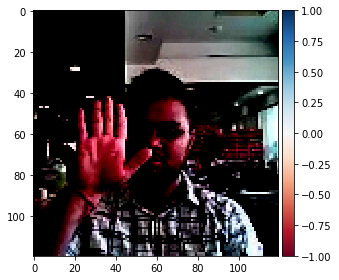

In [201]:
image = io.imread('./Project_data/val/WIN_20180926_17_08_11_Pro_Stop_new/WIN_20180926_17_08_11_Pro_00020.png')
image = image/128 -1
io.imshow(image[0:120, 40:160])

In [149]:
len(image_list)

8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


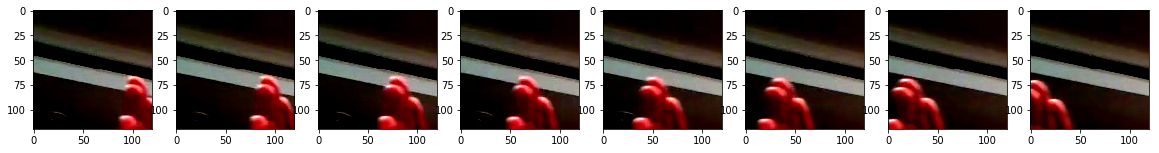

In [205]:
image_datas = image_list

f, axarr = plt.subplots(1,8, figsize=(20,20))
axarr[0].imshow(image_datas[0])
axarr[1].imshow(image_datas[1])
axarr[2].imshow(image_datas[2])
axarr[3].imshow(image_datas[3])
axarr[4].imshow(image_datas[4])
axarr[5].imshow(image_datas[5])
axarr[6].imshow(image_datas[6])
axarr[7].imshow(image_datas[7])

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [214]:
def process_images(source_path, folder_list, batch_size, img_idx, t, num_batches):
    
    for batch in range(num_batches):
        # we iterate over the number of batches
        batch_data = np.zeros((batch_size,30,120,120,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
                    # print(f"----{batch}")
        for folder in range(batch_size):
            # iterate over the batch_size
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
            # print(folder)

            for idx,item in enumerate(img_idx):
                
                #  Iterate iver the frames/images of a folder to read them in
                            # try:
                            # print(idx, item)
                            # print(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/')

                image = io.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)


                              #crop the images and resize them. Note that the images are of 2 different shape 
                              #and the conv3D will throw error if the inputs in a batch have different shapes

                image = image/128 - 1
                if (image.shape[0]!=image.shape[1]):
#                     print(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                    image = image[0:120, 30:150]
                    image = resize(image, (120, 120), mode='constant')
                else:
                    image = resize(image, (120, 120), mode='constant')

                batch_data[folder,idx,:,:,0] = image[:,:,0] 
                batch_data[folder,idx,:,:,1] = image[:,:,1]
                batch_data[folder,idx,:,:,2] = image[:,:,2]
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
                return batch_data, batch_labels


def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = list(range(30))
#     img_idx = np.random.shuffle(img_idx)
    while True:
        t = np.random.permutation(folder_list)
        num_batches = int(len(folder_list)/batch_size)
        # print(len(t))
        yield process_images(source_path, folder_list, batch_size, img_idx, t, num_batches) #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        if (num_batches* batch_size) != len(folder_list):
            remaining_batches = len(folder_list) - (num_batches* batch_size)
            yield process_images(source_path, folder_list, batch_size, img_idx, t, num_batches)


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [215]:
curr_dt_time = datetime.datetime.now()
train_path = './Project_data/train'
val_path = './Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 10
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 10


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [232]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

input_shape = (30, 120, 120, 3)


def model_with_dropout_bn():
    model = Sequential()
    
    model.add(Conv3D(8, kernel_size=(3, 3, 3),input_shape=input_shape, padding='same')) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    model.add(Conv3D(16, kernel_size=(3, 3, 3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    model.add(Conv3D(32, kernel_size=(3, 3, 3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    model.add(Conv3D(64, kernel_size=(3, 3, 3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))      
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(5, activation='softmax'))

    model.summary()
    # model summary
    return model






Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [233]:
model1 = model_with_dropout_bn()
# model2 = model_bn_without_dropout()
# model3 = model_without_dropout_bn()

optimiser = optimizers.Adam()
model1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model1.summary())

# model2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model2.summary())

# model3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_77 (Conv3D)           (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_77 (Batc (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation_77 (Activation)   (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_77 (MaxPooling (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_78 (Conv3D)           (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_78 (Batc (None, 15, 60, 60, 16)    64        
_________________________________________________________________
activation_78 (Activation)   (None, 15, 60, 60, 16)    0         
__________

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [234]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [235]:
 
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)

        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1)
callbacks_list = [cLR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [236]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [19]:
model1.fit_generator(generator= train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ./Project_data/val ; batch size = 40
Source path =  ./Project_data/train ; batch size = 40
Epoch 1/10


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


17/17 [==============================] - 52s 3s/step - loss: 0.0426 - categorical_accuracy: 0.0618 - val_loss: 0.0337 - val_categorical_accuracy: 0.0250

Epoch 00001: saving model to model_init_2021-01-0414_06_24.622069/model-00001-0.04263-0.06176-0.03371-0.02500.h5
Epoch 2/10
17/17 [==============================] - 23s 1s/step - loss: 0.0416 - categorical_accuracy: 0.0059 - val_loss: 0.0415 - val_categorical_accuracy: 0.0083

Epoch 00002: saving model to model_init_2021-01-0414_06_24.622069/model-00002-0.04164-0.00588-0.04151-0.00833.h5
Epoch 3/10
17/17 [==============================] - 23s 1s/step - loss: 0.0407 - categorical_accuracy: 0.0029 - val_loss: 0.0399 - val_categorical_accuracy: 0.0083

Epoch 00003: saving model to model_init_2021-01-0414_06_24.622069/model-00003-0.04074-0.00294-0.03987-0.00833.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
17/17 [==============================] - 23s 1s/step - loss: 0.0406 - categorical_acc

In [345]:
model1.fit_generator(generator= train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/10


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


17/17 [==============================] - 25s 1s/step - loss: 0.3792 - categorical_accuracy: 0.9721 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750

Epoch 00001: saving model to model_init_2021-01-0409_12_00.320497/model-00001-0.37925-0.97206-0.40295-0.97500.h5
Epoch 2/10
17/17 [==============================] - 25s 1s/step - loss: 0.1659 - categorical_accuracy: 0.9882 - val_loss: 0.1343 - val_categorical_accuracy: 0.9917

Epoch 00002: saving model to model_init_2021-01-0409_12_00.320497/model-00002-0.16592-0.98824-0.13432-0.99167.h5
Epoch 3/10
17/17 [==============================] - 25s 1s/step - loss: 0.2133 - categorical_accuracy: 0.9853 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750

Epoch 00003: saving model to model_init_2021-01-0409_12_00.320497/model-00003-0.21333-0.98529-0.40295-0.97500.h5
Epoch 4/10
17/17 [==============================] - 25s 1s/step - loss: 0.3318 - categorical_accuracy: 0.9721 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750

Epoch 00004:

In [100]:
# model.fit_generator(generator= train_generator, validation_data=val_generator, epochs=1)

model1.fit_generator(generator= train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  ./Project_data/val ; batch size = 40
Source path =  ./Project_data/train ; batch size = 40
Epoch 1/15


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


17/17 [==============================] - 26s 2s/step - loss: 0.2837 - categorical_accuracy: 0.7353 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750
Epoch 2/15
17/17 [==============================] - 23s 1s/step - loss: 0.3318 - categorical_accuracy: 0.9794 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750
Epoch 3/15
17/17 [==============================] - 23s 1s/step - loss: 0.2370 - categorical_accuracy: 0.9853 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/15
17/17 [==============================] - 23s 1s/step - loss: 0.3318 - categorical_accuracy: 0.9794 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750
Epoch 5/15
17/17 [==============================] - 23s 1s/step - loss: 0.2607 - categorical_accuracy: 0.9838 - val_loss: 0.4030 - val_categorical_accuracy: 0.9750

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/15
17/17 [===========